# Naive-Bayes Classification

In this section, we dive deeper into one of the sub-classes of supervized learning. This method of calssification is very fast and fairly easy. 

1. Bayes' Theorem: The probability of a label L, given some features as conditions is described as: P(L | features) = P(features | L)(P(L)/P(features)

Assume the data is described by Gaussian distribution with no covariance between dimensions. We can fit the model by finding the mean and standard deviation of the points within each label. 


``` 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);
```



**Multinomial Naive Bayes**

Here the features are assumed to be generated from a simple multinomial distribution. This [multinomial distribution] describes the
probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

# Example - Text Labelling

We can try to classify the category which it belongs to. The features are directly related to the frequencies of the words in a text. A simple way of Feature-Engineering these features is to use the TF–IDF vectorizer. 

In [2]:
# firslty import the data
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [3]:
# We can check the labels of this dataset
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
# Now we can select a few of these possible targets and proceed to download sets
categories = ['rec.motorcycles','sci.electronics', 'sci.med','sci.space']

In [5]:
# create train and test datasets
X_train = fetch_20newsgroups(subset = 'train', categories = categories)
X_test = fetch_20newsgroups(subset = 'test', categories = categories)

In [6]:
# Feature Engineering
# Create a pipeline with model Multinomial Naive Bayes
# and use TF-IDF for feature extraction.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [7]:
# Fit and test the data
model.fit(X_train.data, X_train.target)
labels = model.predict(X_test.data)

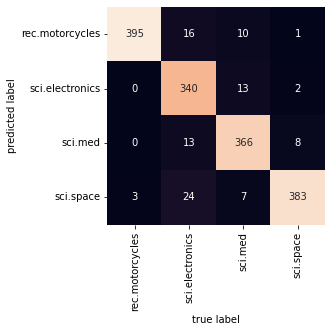

In [8]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(X_test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=X_train.target_names, yticklabels=X_train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
# Create a method that has a string as an argument
def predict_category(s, train=X_train, model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [18]:
predict_category('Alien attack on a shuttle')

'sci.space'

In [17]:
predict_category('Wounded nurse in an apocaliptic hospital')

'sci.med'

In [16]:
predict_category('TV and radio with low-bandth frequency')

'sci.electronics'

In [15]:
predict_category('Wheelie on a highway')

'rec.motorcycles'